In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols
import statsmodels
from scipy import stats
#from pingouin import pairwise_ttests #this is for performing the pairwise tests
#import pingouin as pg

In [2]:
df = pd.read_excel('data_vehicles.xlsx')
df

,ID,Country,License Plate,Vehicle Brand,Vehicle Classification,Year Vehicle,Color,CylinderCapacity (cc),Fuel type,Imported,Service,Engine power (Kw),Engine Size (L),Owner's ID,Gearbox type,Owner name,Owner's phone,owner last name,Owner age,Owner's email
0,0,Mongolia,SVL920,Saturn,car,2004,navajo-white,80,Bio-diesel,yes,Private,148,3.1,6106624260,DSG,Elwood,3304551642,hall,75,Jamilyn73@hotmail.com
1,1,NorthMacedonia,PZW345,NIE,lorry,2006,aquamarine,50,Bio-diesel,yes,Private,176,3.0,9856303493,MT,Shakeia,3532947233,morales,75,Noell75@gmail.com
2,2,Liechtenstein,VIH308,Maybach,bus,2007,apricot,80,Diesel,yes,Private,121,4.9,4522645647,DSG,Shenae,3631978233,campbell,90,Lakrisha86@gmail.com
3,3,Zealand,TFU261,Ariel,tram,2009,chocolate,500,Bio-diesel,no,Public,134,5.3,3956674720,MT,Jalene,3694919587,roberts,78,Usman22@gmail.com
4,4,Azerbaijan,WPL786,Hyundai,tram,2019,wisteria,300,hybrid,no,Private,118,1.1,5993506709,DSG,Roshni,3970009871,tucker,87,Phillips42@hotmail.com
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,Bulgaria,ZJH467,Suzuki,bus,2021,cream,125,Bio-diesel,no,Private,133,4.1,6627117939,AT,Roshawnda,3218892117,rivera,52,Doran77@oulook.com
996,996,Honduras,CSM547,Invicta,train,2014,smalt,300,hybrid,yes,Public,145,2.4,4827104188,MT,Myla,3174237412,ward,72,Mckay33@hotmail.com
997,997,Moldova,OFP866,Maybach,motorbike,2021,lemon-chiffon,50,electric,yes,Private,160,6.4,7119946951,AT,Kashia,3441251050,holmes,36,Naomie25@oulook.com
998,998,BritishIndianOceanTerritory,QDA097,Ford,car,2003,goldenrod,125,electric,yes,Private,104,5.8,4934346295,AT,Retha,3476950744,coleman,27,Rahcel51@hotmail.com


In [3]:
df.head(10)

,ID,Country,License Plate,Vehicle Brand,Vehicle Classification,Year Vehicle,Color,CylinderCapacity (cc),Fuel type,Imported,Service,Engine power (Kw),Engine Size (L),Owner's ID,Gearbox type,Owner name,Owner's phone,owner last name,Owner age,Owner's email
0,0,Mongolia,SVL920,Saturn,car,2004,navajo-white,80,Bio-diesel,yes,Private,148,3.1,6106624260,DSG,Elwood,3304551642,hall,75,Jamilyn73@hotmail.com
1,1,NorthMacedonia,PZW345,NIE,lorry,2006,aquamarine,50,Bio-diesel,yes,Private,176,3.0,9856303493,MT,Shakeia,3532947233,morales,75,Noell75@gmail.com
2,2,Liechtenstein,VIH308,Maybach,bus,2007,apricot,80,Diesel,yes,Private,121,4.9,4522645647,DSG,Shenae,3631978233,campbell,90,Lakrisha86@gmail.com
3,3,Zealand,TFU261,Ariel,tram,2009,chocolate,500,Bio-diesel,no,Public,134,5.3,3956674720,MT,Jalene,3694919587,roberts,78,Usman22@gmail.com
4,4,Azerbaijan,WPL786,Hyundai,tram,2019,wisteria,300,hybrid,no,Private,118,1.1,5993506709,DSG,Roshni,3970009871,tucker,87,Phillips42@hotmail.com
5,5,Mozambique,YZW199,Lamborghini,train,1998,puce,500,hybrid,no,Public,121,4.4,247351693,MT,Joneric,3929608723,king,29,Aren43@hotmail.com
6,6,Cape,TUK192,Volvo,lorry,1991,safety-orange,250,Gasoline,no,Private,137,7.2,148460449,DSG,Antwann,3630295650,johnson,72,Tanairi77@hotmail.com
7,7,PalestinianTerritories,EKM203,Ssangyong,bus,1995,french-rose,200,Diesel,yes,Public,127,1.4,2102787312,AT,Hampton,3910597521,rivera,36,Sharayah75@gmail.com
8,8,Cocos,SXT151,Spyker,bus,2009,beige,600,hybrid,yes,Public,114,4.6,6033366133,AT,Waldo,3808574678,hunter,21,Pinchas77@gmail.com
9,9,Iran,HSL557,NIE,bus,1997,thistle,500,Bio-diesel,no,Public,104,3.2,7511137109,DSG,Raine,3522942765,sullivan,26,Athony77@hotmail.com


In [4]:
df.columns

Index(['ID', 'Country', 'License Plate', 'Vehicle Brand',
       'Vehicle Classification', 'Year Vehicle', 'Color',
       'CylinderCapacity (cc)', 'Fuel type', 'Imported', 'Service',
       'Engine power (Kw)', 'Engine Size (L)', 'Owner's ID', 'Gearbox type',
       'Owner name', 'Owner's phone', 'owner last name', 'Owner age',
       'Owner's email'],
      dtype='object')

In [5]:
df.describe()

,ID,Year Vehicle,CylinderCapacity (cc),Engine power (Kw),Engine Size (L),Owner's ID,Owner's phone,Owner age
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1.000000e+03,1000.000000
mean,499.500000,2005.755000,299.180000,148.501000,4.638600,4.999780e+09,3.512105e+09,54.206000
std,288.819436,9.593905,224.934041,28.304118,2.184922,2.866338e+09,2.936038e+08,20.714842
min,0.000000,1990.000000,50.000000,100.000000,0.900000,1.038821e+07,3.001174e+09,18.000000
25%,249.750000,1997.000000,125.000000,125.000000,2.800000,2.536584e+09,3.251416e+09,36.000000
50%,499.500000,2006.000000,200.000000,148.000000,4.600000,5.029586e+09,3.531400e+09,54.000000
75%,749.250000,2014.000000,500.000000,172.250000,6.500000,7.455339e+09,3.775023e+09,72.000000
max,999.000000,2022.000000,800.000000,199.000000,8.400000,9.999768e+09,3.999712e+09,90.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      1000 non-null   int64  
 1   Country                 1000 non-null   object 
 2   License Plate           1000 non-null   object 
 3   Vehicle Brand           1000 non-null   object 
 4   Vehicle Classification  1000 non-null   object 
 5   Year Vehicle            1000 non-null   int64  
 6   Color                   1000 non-null   object 
 7   CylinderCapacity (cc)   1000 non-null   int64  
 8   Fuel type               1000 non-null   object 
 9   Imported                1000 non-null   object 
 10  Service                 1000 non-null   object 
 11  Engine power (Kw)       1000 non-null   int64  
 12  Engine Size (L)         1000 non-null   float64
 13  Owner's ID              1000 non-null   int64  
 14  Gearbox type            1000 non-null   o

In [7]:
df['Country'].unique()

array(['Mongolia', 'NorthMacedonia', 'Liechtenstein', 'Zealand',
       'Azerbaijan', 'Mozambique', 'Cape', 'PalestinianTerritories',
       'Cocos', 'Iran', 'Singapore', 'SahrawiArabDemocraticRepublic',
       'Svalbard&Jan', 'NorthernCyprus', 'SolomonIslands',
       'St.Vincent&Grenadines', 'Australia', 'Tonga', 'Burundi', 'Rica',
       'Nigeria', 'Nicaragua', 'Luxembourg', 'Canada', 'Cook', 'Cambodia',
       'New', 'Cuba', 'Guadeloupe', 'Palau', 'Korea', 'Aruba', 'Slovenia',
       'Chad', 'Antigua&Barbuda', 'Leone', 'Niue', 'Cyprus',
       'UnitedStates', 'Cameroon', 'China', 'UnitedArabEmirates', 'Nauru',
       'Montenegro', 'Philippines', 'Congo', 'Angola', 'Czechia',
       'Ireland', 'Timor-Leste', 'Vietnam', 'Madagascar', 'Jordan',
       'Brunei', 'Albania', 'FaroeIslands', 'CentralAfricanRepublic',
       'Caledonia', 'Togo', 'Bhutan', 'Uganda', 'Uruguay',
       'SÃ£oTomÃ©&PrÃ\xadncipe', 'Islands', 'Libya', 'Belize', 'Ã…land',
       'Tunisia', 'Kuwait', 'St.Kitts', 'M

In [8]:
df['Vehicle Brand'].unique()

array(['Saturn', 'NIE', 'Maybach', 'Ariel', 'Hyundai', 'Lamborghini',
       'Volvo', 'Ssangyong', 'Spyker', 'Alfa', 'Bristol', 'Peugeot',
       'Tesla', 'Mini', 'Superformance', 'Audi', 'Jaguar', 'Callaway',
       'LandRover', 'Noble', 'Perodua', 'Campagna', 'Suzuki', 'Chrysler',
       'Koenigsegg', 'Gumpert', 'Fiat', 'Elfin', 'Martin', 'Cadillac',
       'Citroen', 'MB', 'Aston', 'Marcos', 'BMW', 'Smart', 'Subaru',
       'Ferrari', 'Holden', 'Caerham', 'Renault', 'Maserati', 'Lobini',
       'Shelby', 'Lexus', 'Tata', 'Skoda', 'Saab', 'Opel', 'Nissan',
       'Chevrolet', 'Rolls-Royce', 'Jeep', 'Ascari', 'Volkswagen', 'TVR',
       'Proton', 'Vauxhal', 'Unique', 'Radical', 'Daihatsu', 'Corvette',
       'Ford', 'Honda', 'Seat', 'Invicta', 'Pagani', 'Alpina', 'Porsche',
       'Humer', 'SSC', 'Bentley', 'Isuzu', 'Mercedes-Benz', 'Roadcars',
       'Brooke', 'Mitsubishi', 'Lotus', 'Mazda', 'Kia', 'Toyota', 'Dodge',
       'Westfield', 'Morgan', 'Romeo'], dtype=object)

In [9]:

value1= df.groupby(['Vehicle Brand'])['ID'].count().reset_index()

In [10]:
f1 = value1.sort_values(by=['ID'], ascending=False)

In [11]:
D1=f1.iloc[:10]

In [12]:
D1

,Vehicle Brand,ID
11,Caerham,20
0,Alfa,19
1,Alpina,18
43,Maserati,17
78,Tesla,17
30,Isuzu,16
7,Bentley,16
61,Roadcars,16
2,Ariel,16
56,Peugeot,16


<AxesSubplot:xlabel='Vehicle Brand', ylabel='count'>

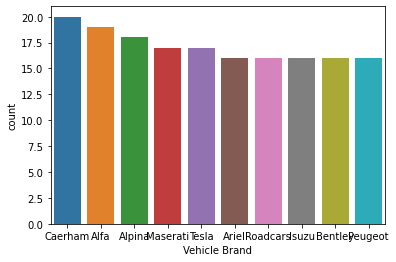

In [13]:
sns.countplot(data = df, x = 'Vehicle Brand', order = df['Vehicle Brand'].value_counts().iloc[:10].index)

In [14]:
value2= df.groupby(['Country'])['ID'].count().reset_index()

In [15]:
f2 = value2.sort_values(by=['ID'], ascending=False)

In [16]:
D2=f2.iloc[:10]

In [17]:
D2

,Country,ID
46,CentralAfricanRepublic,12
207,South,11
137,Madagascar,11
27,Bhutan,11
109,Islands,10
158,Myanmar,9
134,Luxembourg,9
17,Azerbaijan,9
150,Micronesia,9
154,Montenegro,8


<AxesSubplot:xlabel='Country', ylabel='count'>

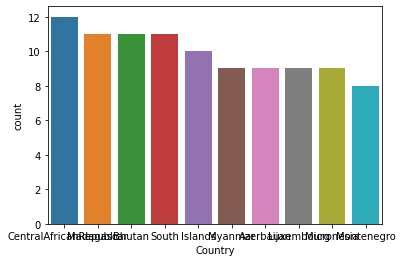

In [18]:
sns.countplot(data = df, x = 'Country', order = df['Country'].value_counts().iloc[:10].index)

In [19]:
value3= df.groupby(['Year Vehicle'])['ID'].count().reset_index()

In [20]:
f3 = value3.sort_values(by=['ID'], ascending=False)

In [21]:
f3

,Year Vehicle,ID
5,1995,41
30,2020,38
17,2007,38
10,2000,37
12,2002,36
18,2008,36
0,1990,35
7,1997,35
29,2019,33
3,1993,32


<AxesSubplot:xlabel='Year Vehicle', ylabel='count'>

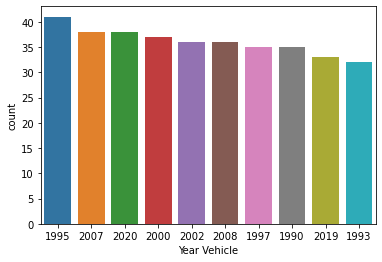

In [22]:
sns.countplot(data = df, x = 'Year Vehicle', order = df['Year Vehicle'].value_counts().iloc[:10].index)

<AxesSubplot:xlabel='Year Vehicle', ylabel='Owner age'>

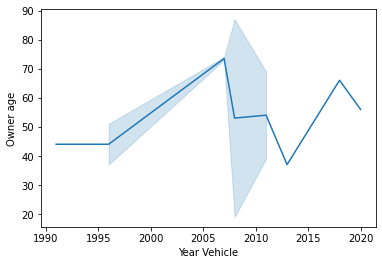

In [23]:
my_country = df.query("Country == 'CentralAfricanRepublic'")
sns.lineplot(data=my_country, x="Year Vehicle", y="Owner age")

<AxesSubplot:xlabel='Year Vehicle', ylabel='Owner age'>

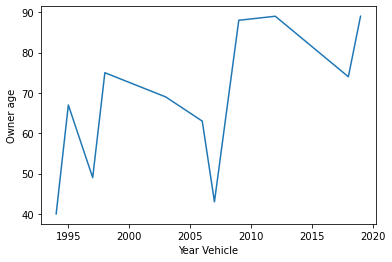

In [24]:
my_country = df.query("Country == 'South'")
sns.lineplot(data=my_country, x="Year Vehicle", y="Owner age")

<AxesSubplot:xlabel='Year Vehicle', ylabel='Owner age'>

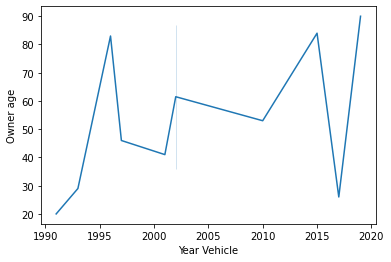

In [25]:
my_country = df.query("Country == 'Madagascar'")
sns.lineplot(data=my_country, x="Year Vehicle", y="Owner age")

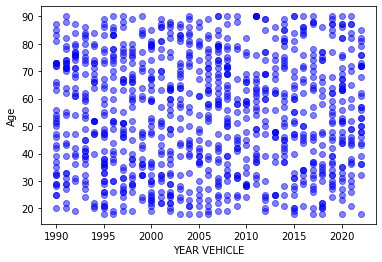

In [26]:
# Diagrama de dispersion de proposito con respecto a valor del prestamo
plt.scatter(df['Year Vehicle'], df['Owner age'],c='blue', alpha=0.5)
plt.xlabel('YEAR VEHICLE')
plt.ylabel('Age')
plt.show()

Text(0, 0.5, 'Cylinder Capacity(cc)')

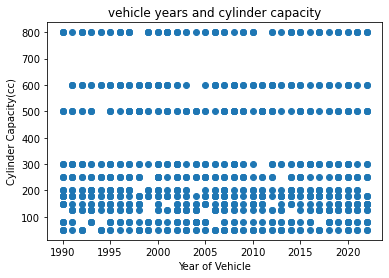

In [27]:
#plt scatter
plt.scatter(df['Year Vehicle'],df['CylinderCapacity (cc)'])
plt.title('vehicle years and cylinder capacity')
plt.xlabel('Year of Vehicle')
plt.ylabel('Cylinder Capacity(cc)')

In [34]:
df.describe()

,ID,Year Vehicle,CylinderCapacity (cc),Engine power (Kw),Engine Size (L),Owner's ID,Owner's phone,Owner age
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1.000000e+03,1000.000000
mean,499.500000,2005.755000,299.180000,148.501000,4.638600,4.999780e+09,3.512105e+09,54.206000
std,288.819436,9.593905,224.934041,28.304118,2.184922,2.866338e+09,2.936038e+08,20.714842
min,0.000000,1990.000000,50.000000,100.000000,0.900000,1.038821e+07,3.001174e+09,18.000000
25%,249.750000,1997.000000,125.000000,125.000000,2.800000,2.536584e+09,3.251416e+09,36.000000
50%,499.500000,2006.000000,200.000000,148.000000,4.600000,5.029586e+09,3.531400e+09,54.000000
75%,749.250000,2014.000000,500.000000,172.250000,6.500000,7.455339e+09,3.775023e+09,72.000000
max,999.000000,2022.000000,800.000000,199.000000,8.400000,9.999768e+09,3.999712e+09,90.000000


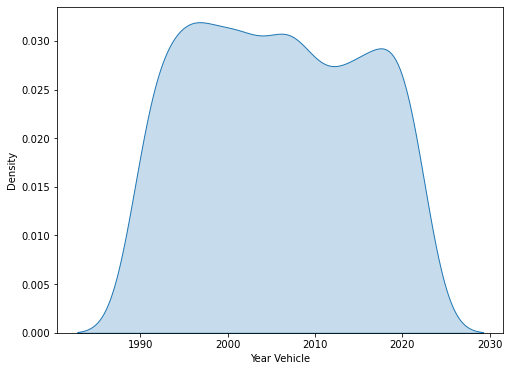

In [38]:
# Frecuencias de probabilidad

fig, ax = plt.subplots(figsize=(8,6))
sns.kdeplot(data=df, x='Year Vehicle', fill=True)
plt.show()

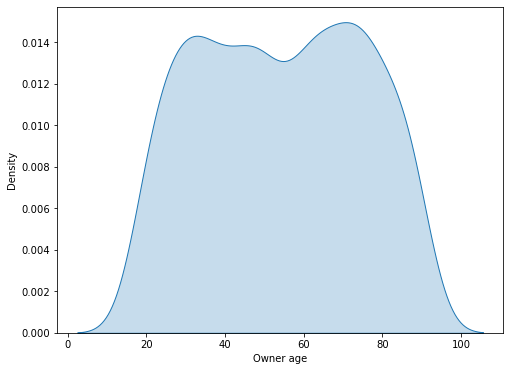

In [39]:
# Frecuencias de probabilidad

fig, ax = plt.subplots(figsize=(8,6))
sns.kdeplot(data=df, x='Owner age', fill=True)
plt.show()

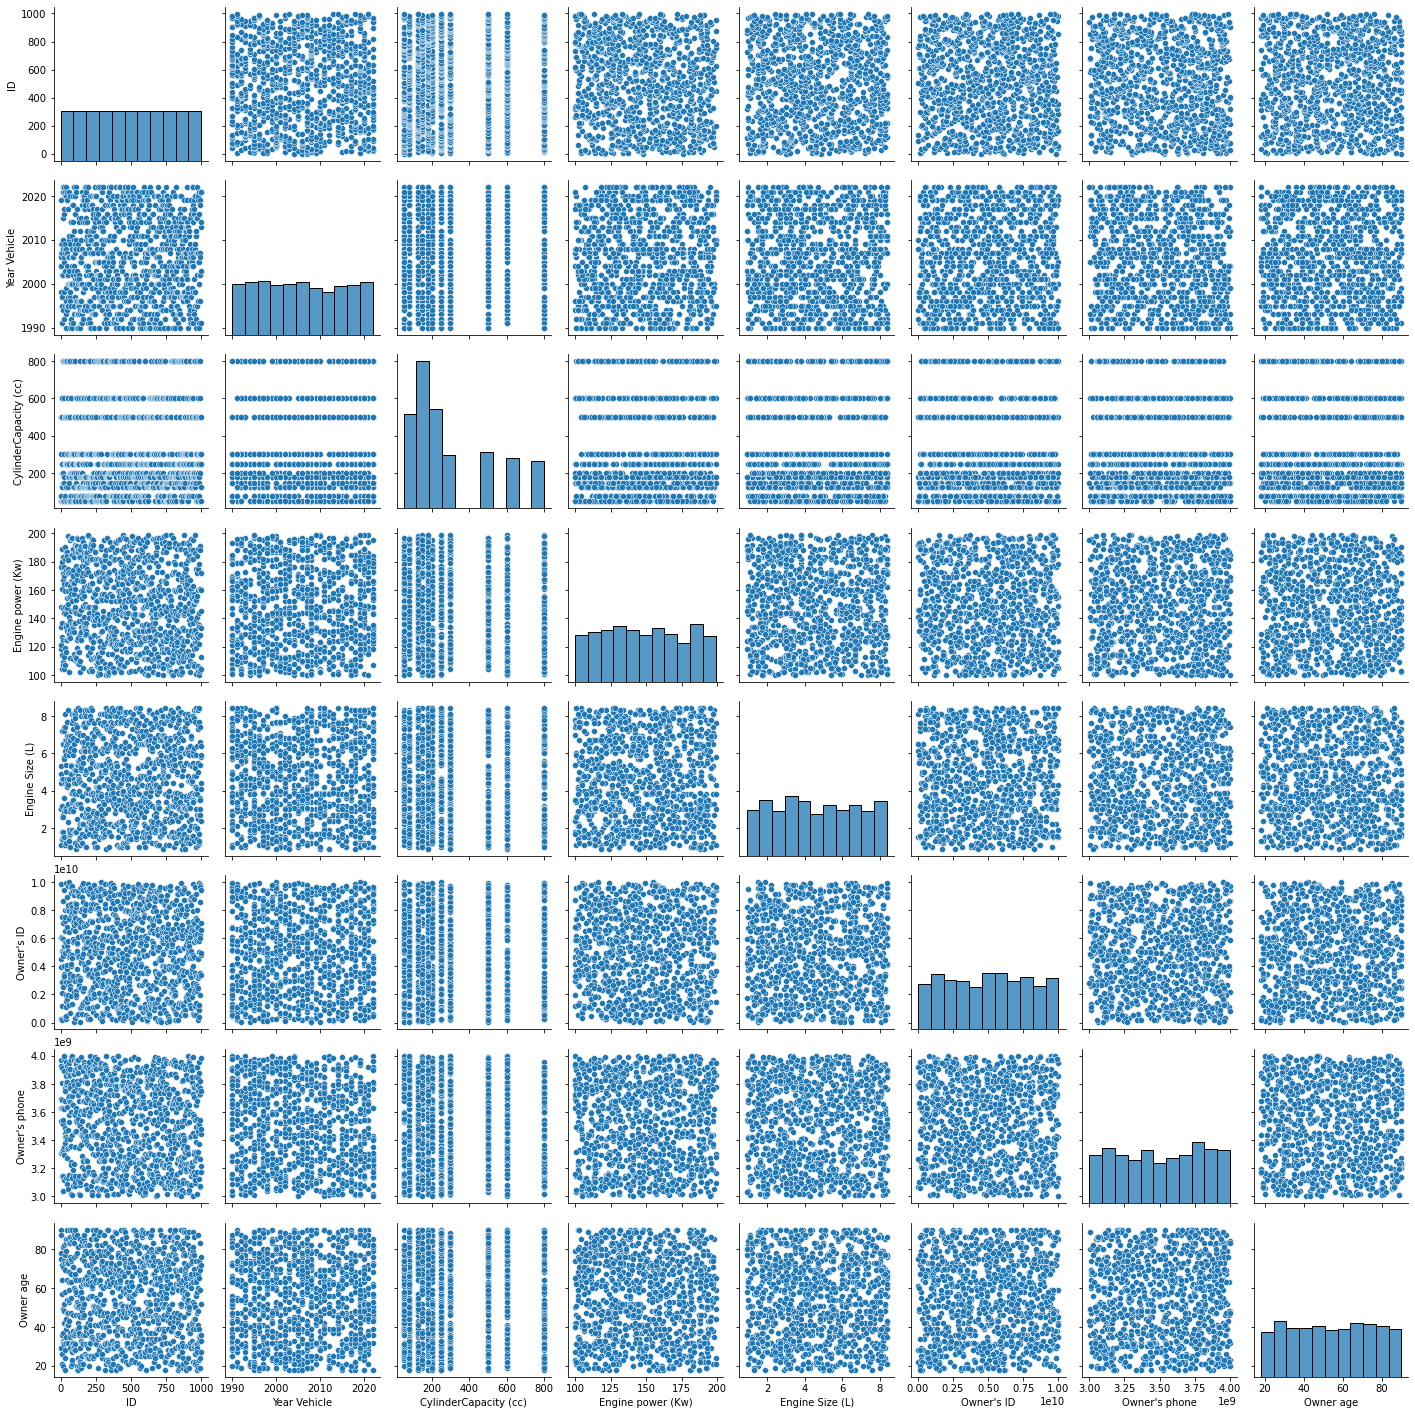

In [28]:
sns.pairplot(df)

In [29]:
df_corr = df.corr(method='spearman')
df_corr

,ID,Year Vehicle,CylinderCapacity (cc),Engine power (Kw),Engine Size (L),Owner's ID,Owner's phone,Owner age
ID,1.000000,0.017099,0.005139,-0.083381,-0.022548,-0.045452,-0.086079,0.004368
Year Vehicle,0.017099,1.000000,-0.021117,0.019515,0.006098,0.044031,-0.128572,0.002282
CylinderCapacity (cc),0.005139,-0.021117,1.000000,0.057699,0.017980,0.012600,-0.001284,-0.002158
Engine power (Kw),-0.083381,0.019515,0.057699,1.000000,0.010074,-0.020913,0.018238,-0.003553
Engine Size (L),-0.022548,0.006098,0.017980,0.010074,1.000000,-0.016883,0.018023,0.021115
Owner's ID,-0.045452,0.044031,0.012600,-0.020913,-0.016883,1.000000,-0.033819,0.012385
Owner's phone,-0.086079,-0.128572,-0.001284,0.018238,0.018023,-0.033819,1.000000,-0.007081
Owner age,0.004368,0.002282,-0.002158,-0.003553,0.021115,0.012385,-0.007081,1.000000


<AxesSubplot:>

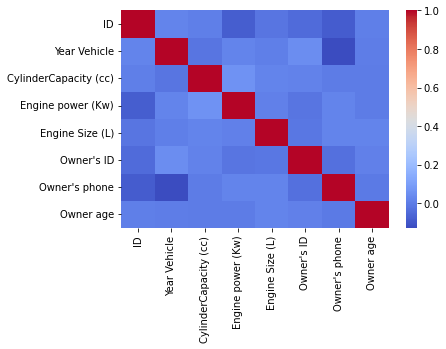

In [30]:
sns.heatmap( df_corr,
            xticklabels = df_corr.columns,
            yticklabels = df_corr.columns,
            cmap = 'coolwarm'
)

In [42]:
mask = np.triu(np.ones_like(df_corr,dtype=bool))

f, ax = plt.subplots( figsize(15, 5))

sns.heatmap(df_corr, mask=mask, cmap='Blues', vmax=1, center=0,
           square=True, linewidths=.1 , annot = True)

NameError: name 'figsize' is not defined